In [57]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [58]:
from google.colab import files
uploaded = files.upload()

Saving BNB-USD.csv to BNB-USD.csv


In [59]:
import io
df = pd.read_csv("BNB-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-05,9.145680,16.717699,9.094680,14.917200,14.917200,341504992
2018-01-06,14.868900,23.508200,14.821200,22.759800,22.759800,637020992
2018-01-07,22.769100,22.769100,18.242500,18.656799,18.656799,258050000
2018-01-08,18.646500,19.216700,15.347100,18.260900,18.260900,296617984
2018-01-09,18.174000,20.320299,16.801399,17.411800,17.411800,194750000
...,...,...,...,...,...,...
2023-01-01,246.332901,246.485809,243.575287,244.136978,244.136978,278651737
2023-01-02,244.152222,247.715271,241.692490,245.535904,245.535904,357733262
2023-01-03,245.552139,246.831451,244.784042,246.133362,246.133362,377452410


Text(0, 0.5, 'ETH-USD Açılış Fiyatları')

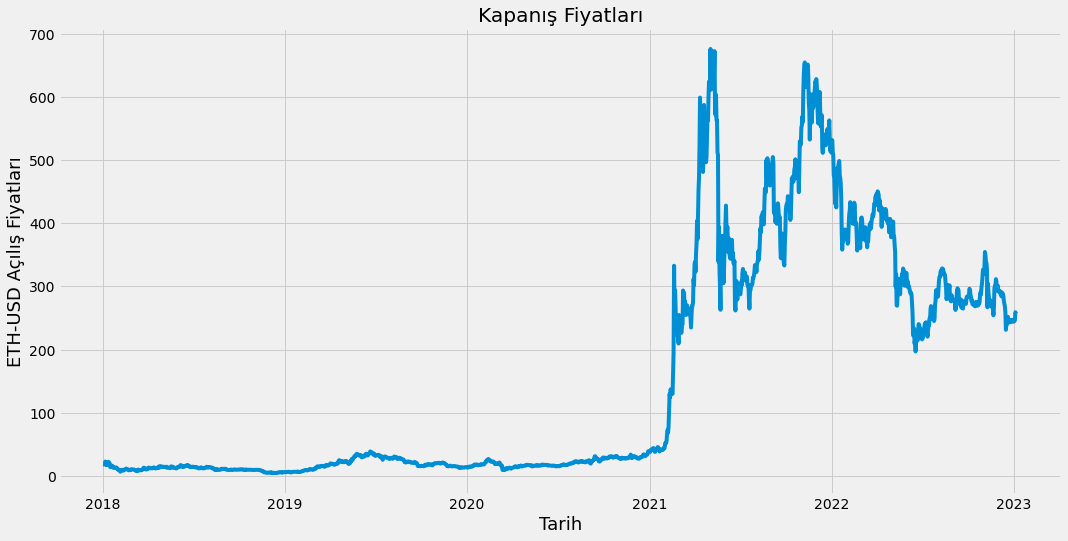

In [60]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('ETH-USD Açılış Fiyatları', fontsize=18)


In [61]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1462

In [62]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01547861],
       [0.02716383],
       [0.02105049],
       ...,
       [0.35998325],
       [0.37933246],
       [0.37645151]])

In [63]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01547861, 0.02716383, 0.02105049, 0.02046061, 0.01919548,
       0.01916419, 0.0246054 , 0.02650302, 0.0262916 , 0.02420997,
       0.02240323, 0.01395094, 0.01441477, 0.01452979, 0.01551347,
       0.01737548, 0.01421377, 0.01264379, 0.01276135, 0.01355878,
       0.01296235, 0.01294715, 0.012999  , 0.01342692, 0.01227115,
       0.01001564, 0.00985815, 0.00743075, 0.00763406, 0.00777917,
       0.00585556, 0.00324274, 0.00560258, 0.00531376, 0.00605948,
       0.00775053, 0.00704355, 0.00622249, 0.00714264, 0.00664247,
       0.00874902, 0.00953944, 0.00994248, 0.01066914, 0.00919869,
       0.00975489, 0.00800986, 0.00722953, 0.00651918, 0.00769339,
       0.00687361, 0.00717859, 0.0080066 , 0.00913537, 0.00880504,
       0.00891157, 0.00848708, 0.0084768 , 0.00867079, 0.00831678])]
[0.00723488147228465]

[array([0.01547861, 0.02716383, 0.02105049, 0.02046061, 0.01919548,
       0.01916419, 0.0246054 , 0.02650302, 0.0262916 , 0.02420997,
       0.02240323, 0.01395094, 0.01

In [64]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [65]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1402, 60, 1)


In [66]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [67]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [68]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
1402/1402 [==============================] - 40s 26ms/step - loss: 0.0033
Epoch 2/5
1402/1402 [==============================] - 38s 27ms/step - loss: 0.0016
Epoch 3/5
1402/1402 [==============================] - 36s 26ms/step - loss: 0.0012
Epoch 4/5
1402/1402 [==============================] - 38s 27ms/step - loss: 8.7457e-04
Epoch 5/5
1402/1402 [==============================] - 38s 27ms/step - loss: 8.7186e-04


In [69]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [70]:
x_test = np.array(x_test)

In [71]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [72]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 16ms/step


In [73]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

45.579912832424554

<ipython-input-74-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


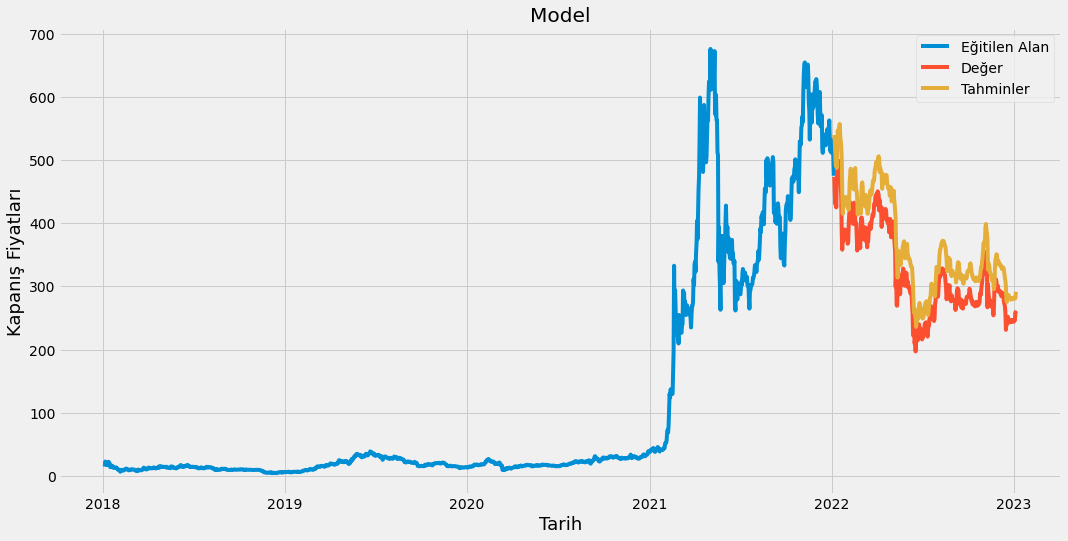

                 Close   Tahminler
Date                              
2022-01-06  473.275604  539.453979
2022-01-07  447.788483  530.942322
2022-01-08  430.246155  511.254761
2022-01-09  438.803070  491.938629
2022-01-10  424.933777  495.184998
...                ...         ...
2023-01-01  244.136978  281.886444
2023-01-02  245.535904  280.372650
2023-01-03  246.133362  280.635590
2023-01-04  259.119690  281.452576
2023-01-05  257.186127  291.428497

[365 rows x 2 columns]


In [74]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)